# Semanal#4

## Autor: Guzmán Pedro

In [1]:

# Librerías externas NumPy, SciPy y Matplotlib
from scipy.signal import TransferFunction
#import math
# Librería de TC2, esta la vas a usar mucho
from pytc2.sistemas_lineales import analyze_sys, pretty_print_bicuad_omegayq, tf2sos_analog, pretty_print_SOS, pretty_print_lti
import numpy as np
import sympy as sp
from scipy import signal as sig
import matplotlib.pyplot as plt

## Resolución hecha a mano

En la resolucion en PDF se encuentran resueltos todos los incisos, incluyendo los BONUS

In [2]:
from IPython.display import IFrame
IFrame("./Semanal5_ResolucionAMano.pdf", width=1000, height=1000)

# Inciso 4

Transferencia pasa-bajos
------------------------


<IPython.core.display.Math object>

Transferencia pasa-banda obtenida con funciones de python
------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Transferencia pasa-banda Obtenida a mano
------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Transferencia pasa-banda Obtenida a mano final
------------------------


<IPython.core.display.Math object>

Transferencia 1
Transferencia 2
Transferencia 3
Transferencia Total


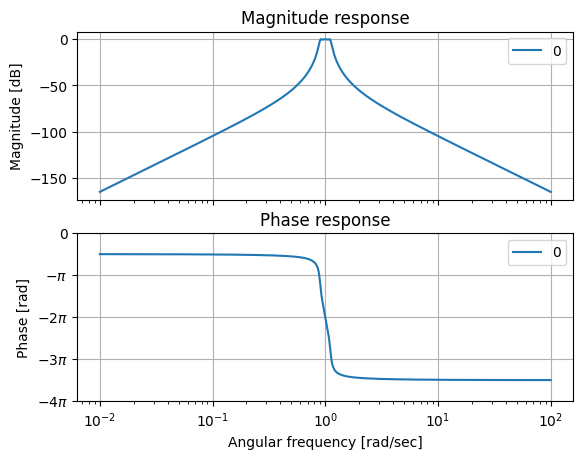

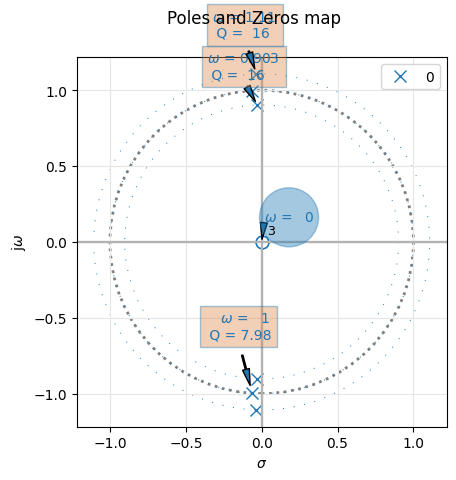

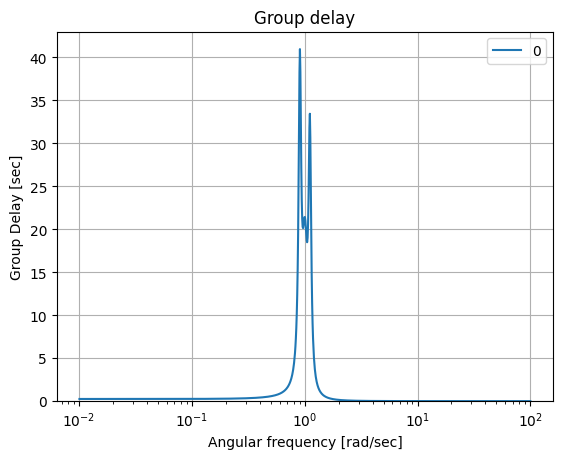

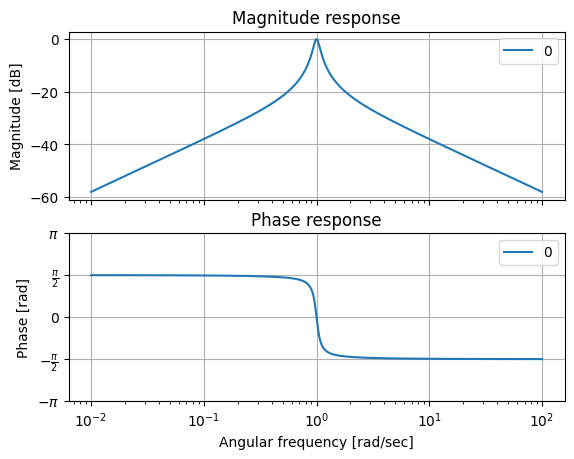

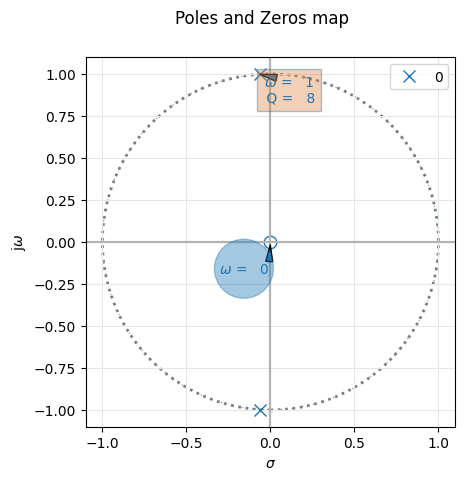

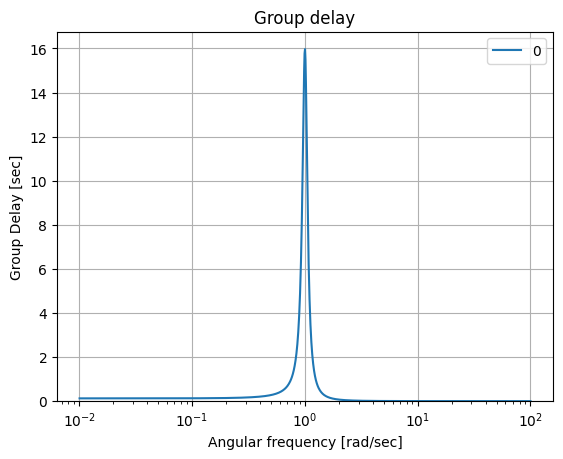

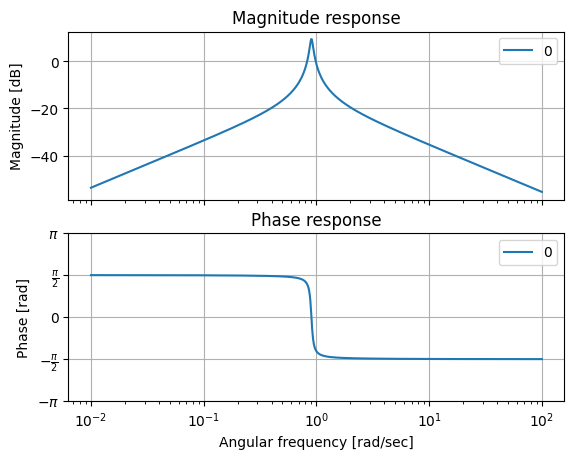

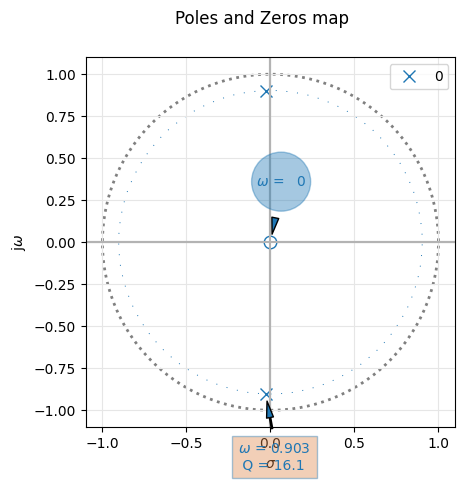

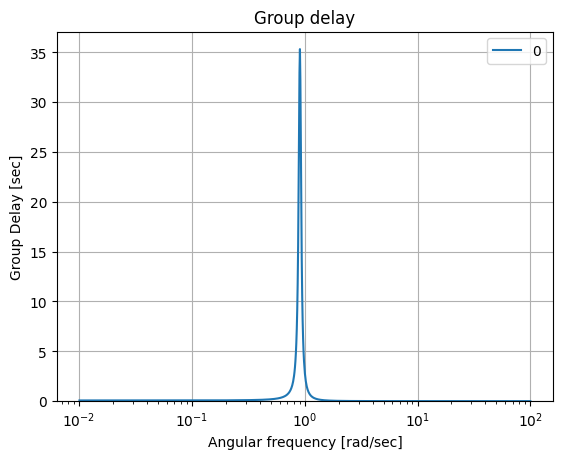

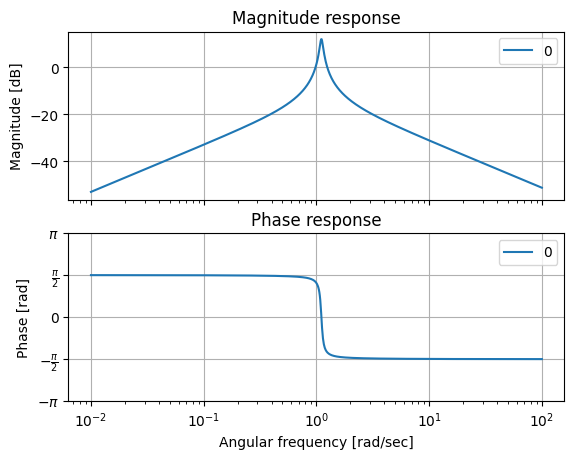

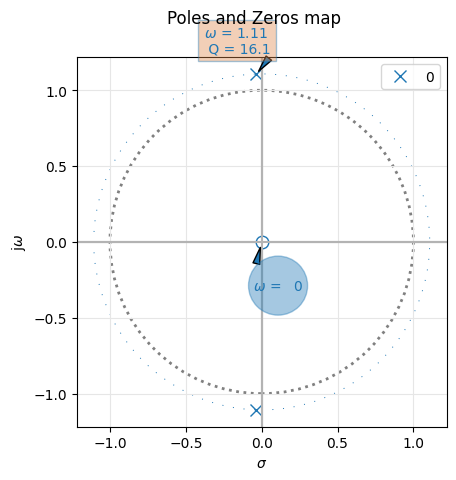

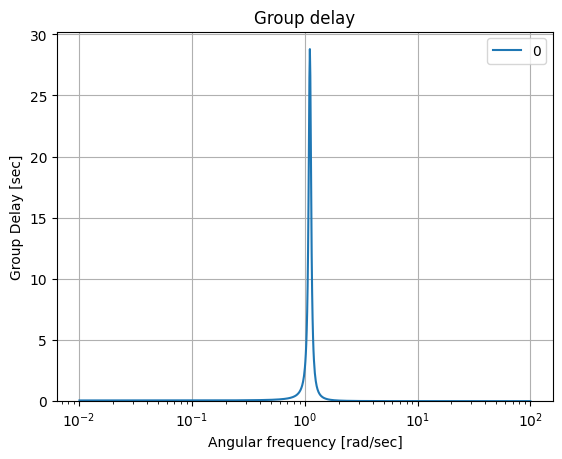

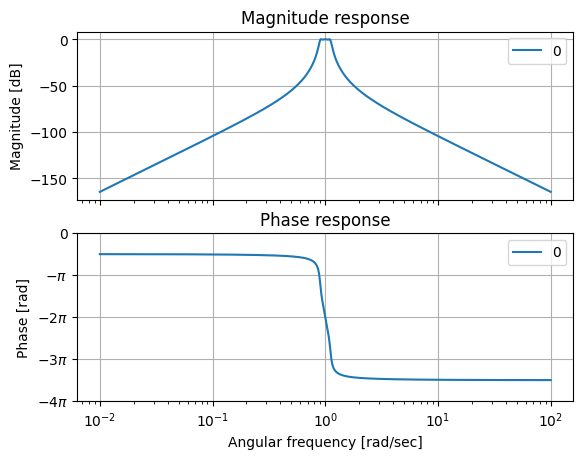

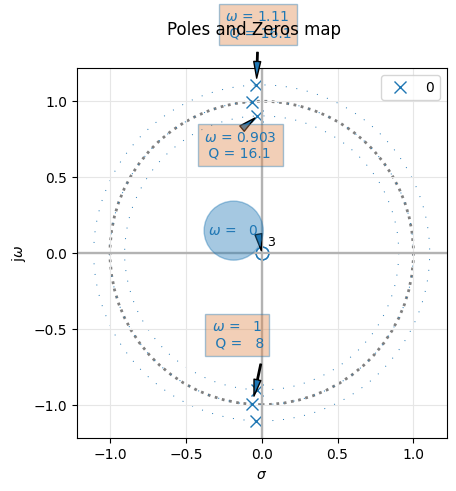

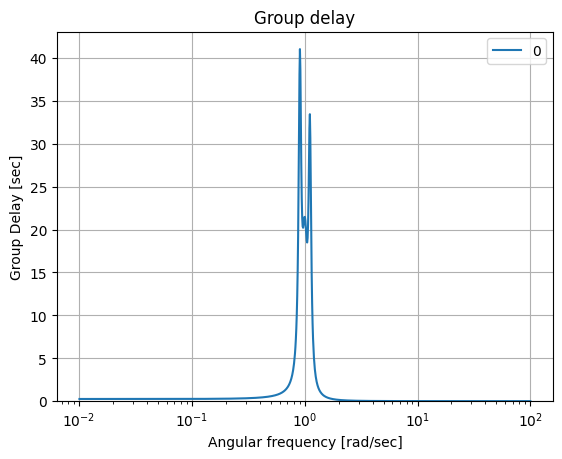

In [3]:

this_ripple = 0.5
this_order = 3
Q=5
eps = np.sqrt( 10**(this_ripple/10) - 1 )

z,p,k = sig.cheb1ap(this_order, this_ripple)

num, den = sig.zpk2tf(z,p,k)

# factorizamos en SOS's
this_sos = tf2sos_analog(num, den)


print( 'Transferencia pasa-bajos')
print( '------------------------')

pretty_print_SOS(this_sos, mode='omegayq')

num_bp, den_bp = sig.lp2bp(num, den,bw=(1/Q))

this_sos_bp = tf2sos_analog(num_bp, den_bp)

print( 'Transferencia pasa-banda obtenida con funciones de python')
print( '------------------------')
pretty_print_SOS(this_sos_bp, mode='omegayq')
#_ = analyze_sys( this_sos )
pretty_print_lti(num_bp,den_bp)
_ = analyze_sys( sig.TransferFunction(num_bp,den_bp), same_figs=False )
print( 'Transferencia pasa-banda Obtenida a mano')
print( '------------------------')

num1 = [0.625/5, 0]

dem1 = [1, 0.625/5 ,1 ]

num2 = [(3*0.0562) , 0]

dem2 = [1, 0.0562 , (0.9034**2) ]

num3 = [(4*0.069), 0]

dem3 = [1, 0.069, 1.1075**2 ]


this_sos1 = tf2sos_analog(num1, dem1)
this_sos2 = tf2sos_analog(num2, dem2)
this_sos3 = tf2sos_analog(num3, dem3)
pretty_print_SOS(this_sos1, mode='omegayq')
pretty_print_SOS(this_sos2, mode='omegayq')
pretty_print_SOS(this_sos3, mode='omegayq')
#Por alguna razon les pone S**2 en el numerador cuando no deberia, deberia ser directamente s
#Ya lo vimos en clase y es por la funcion tf2sos_analog

num_total = np.polymul(np.polymul(num1, num2), num3)
dem_total = np.polymul(np.polymul(dem1, dem2), dem3)
this_sosf = tf2sos_analog(num_total, dem_total)
print( 'Transferencia pasa-banda Obtenida a mano final')
print( '------------------------')
pretty_print_SOS(this_sosf, mode='omegayq')

print( 'Transferencia 1')
_ = analyze_sys(sig.TransferFunction(num1,dem1),same_figs=False)
print( 'Transferencia 2')
_ = analyze_sys(sig.TransferFunction(num2,dem2),same_figs=False)
print( 'Transferencia 3')
_ = analyze_sys(sig.TransferFunction(num3,dem3),same_figs=False)
print( 'Transferencia Total')
_ = analyze_sys(sig.TransferFunction(num_total,dem_total),same_figs=False)

##No se ve como yo quiero jajaj





# Bonus 1
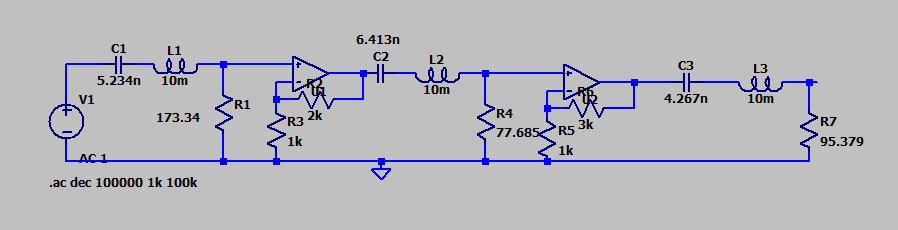

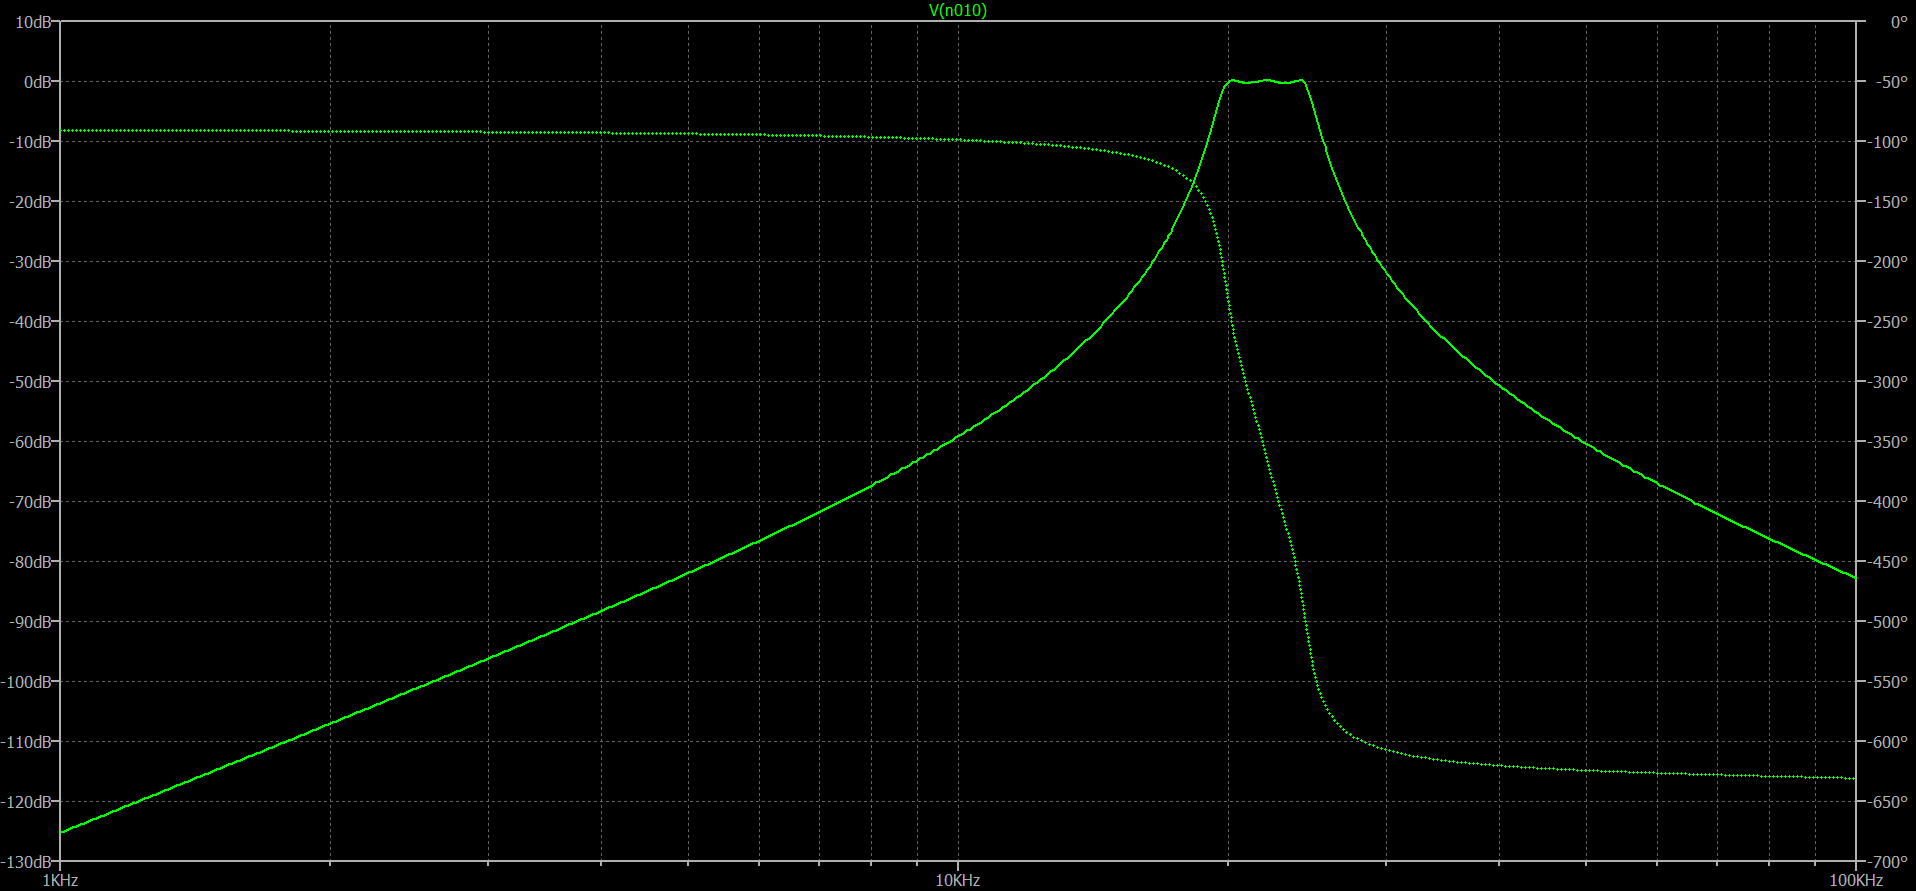

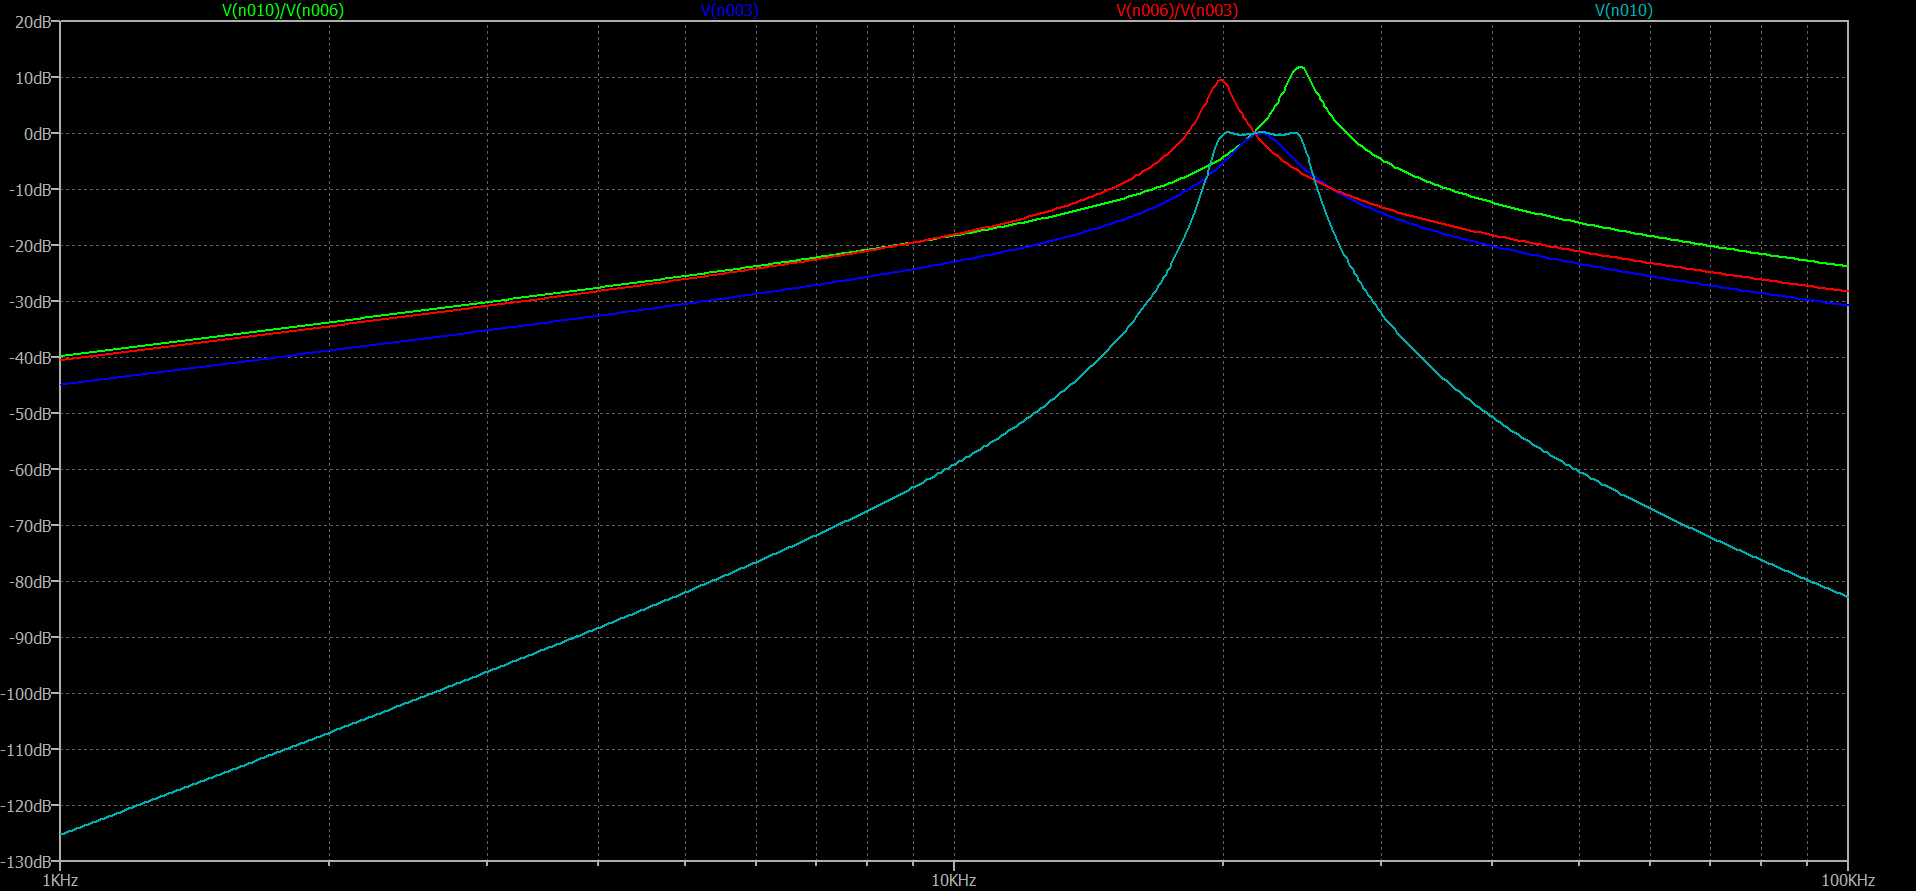

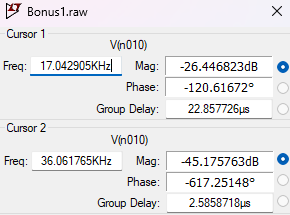

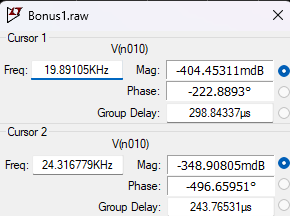

Se puede ver como el circuito cumple perfectamente los valores de la plantilla. Los valores de los componentes fueron sacados en la parte BONUS 1 en la resolución hecha a mano.


# Bonus 3
## Simulación con FDNR
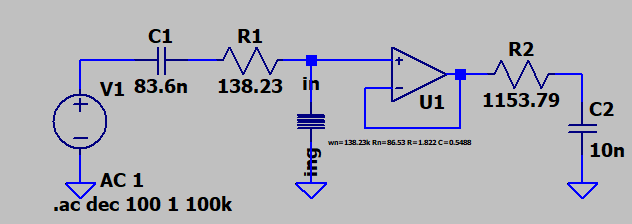


## Simulación sin FDNR
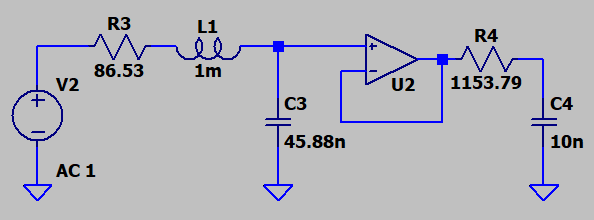

## Comparativa de ambos

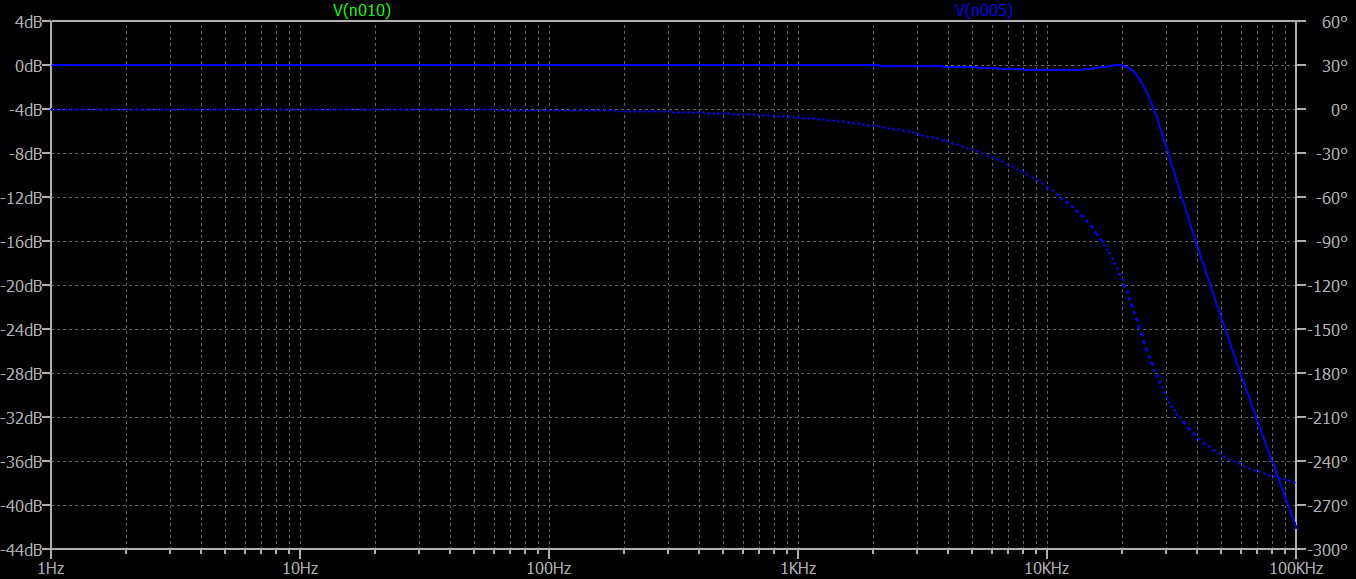

